In [1]:
from json import load, loads

import numpy as np
import pandas as pd

data = []
with open("arxiv.json", "r") as f:
    for i, datum in enumerate(f):
        if i % 1000 == 0:
            print(end=".")
        if i % 100000 == 0:
            print()
        if "cs.LG" not in datum.split('"categories"')[-1].split(",")[0]:
            continue
        try:
            datum = loads(datum.strip())
            data.append(datum)
        except:
            pass

data = pd.DataFrame(data)
data.info()

.
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................................................................

<Axes: >

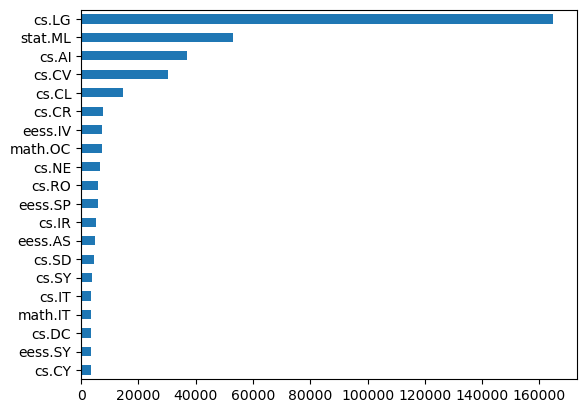

In [3]:
category_stats = data.categories.str.split().explode().value_counts(ascending=True).tail(20)
category_stats.plot.barh()

<Axes: >

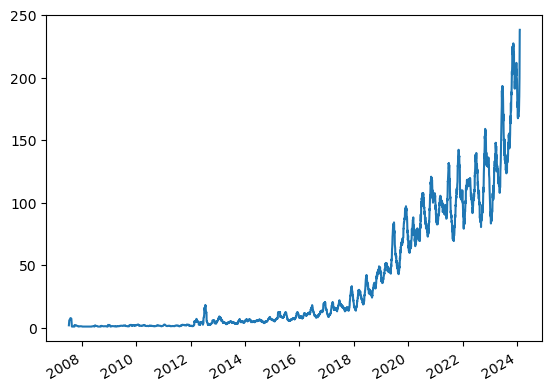

In [11]:
data.update_date.value_counts().sort_index().rename(pd.to_datetime).rolling("31d").mean()[7:].plot.line()

In [ ]:
import spacy

nlp = spacy.load("en_core_web_trf")
doc = nlp("Apple shares rose on the news. Apple pie is delicious.")
doc._.trf_data.all_outputs[-1].data[-1].round(2)

In [ ]:
from tqdm.notebook import tqdm

def get_contextual_vector(doc):
    try:
        return doc._.trf_data.all_outputs[-1].data[-1]
    except:
        return np.zeros(768, dtype="float")

vecs = [
    get_contextual_vector(doc)
    for doc in tqdm(
        nlp.pipe(data.title.values, n_process=4, batch_size=256), total=len(data)
    )
]
vecs = np.array(vecs)